In [1]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle





In [2]:
sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
#plt.rcParams['dpi'] = 300
plt.style.use('seaborn-white')

sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(15,15))
sc.settings.figdir = "sfig10"

/tmp/ipykernel_16750/2720213715.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [3]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


In [4]:
# RENAME = {"CCL19+ fibroblast": "COLEC11+C7+ fibroblast"}
# adata.obs["test13"]=adata.obs["test13"].map(RENAME).fillna(adata.obs["test13"])

# COLEC11_FBS = ['SPP1', 'CAV1', 'ANGPTL2','COLEC11', "CXCL12", "C7"] 
# sc.pl.dotplot(adata_fetal, COLEC11_FBS, 'test13', dendrogram=True, standard_scale='var',
#                  colorbar_title='Z-scaled scores', cmap='Reds')

In [5]:
#PATH='/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas/adata_fetal_and_adult_fbs.h5ad'
PATH = '/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_fetal_and_adult_fbs.h5ad'
adata=sc.read_h5ad(PATH)
adata.X[:6,:6].A


array([[0.        , 0.        , 0.51248444, 0.51248444, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.91178454, 0.        , 0.        ,
        0.        ],
       [0.58537907, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.39431788, 0.        , 0.39431788, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [ ]:
# COLEC_GENES = ["COLEC11", "C7", "SULT1E1", "CFH", "CALCRL", "KLF9", "OMD", "CXCL8", "BMP5", "ANGPT1", "FOXC1","FOXC2", "AVPR1A", 
#  "ENPEP",  "CTSV", "COLEC10", "IL1R1", "ENG", "CLEC2B", "COL25A1", "KAZN", "FOXF2", "EYA1", "CEMIP", "CYP4X1", "KRT18"]

# sc.pl.dotplot(
#     adata,
#     COLEC_GENES,
#     groupby="test13",
#     standard_scale="var",
#     dendrogram=False,
# )

# sfig10b

In [7]:
import pickle

file_path = "/nfs/team298/ls34/new_disease_atlas/fetal_fb_dict.pkl"

# Load the dictionary
with open(file_path, "rb") as file:
    GENES_DEGS = pickle.load(file)

print("Dictionary successfully loaded!")

Dictionary successfully loaded!


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


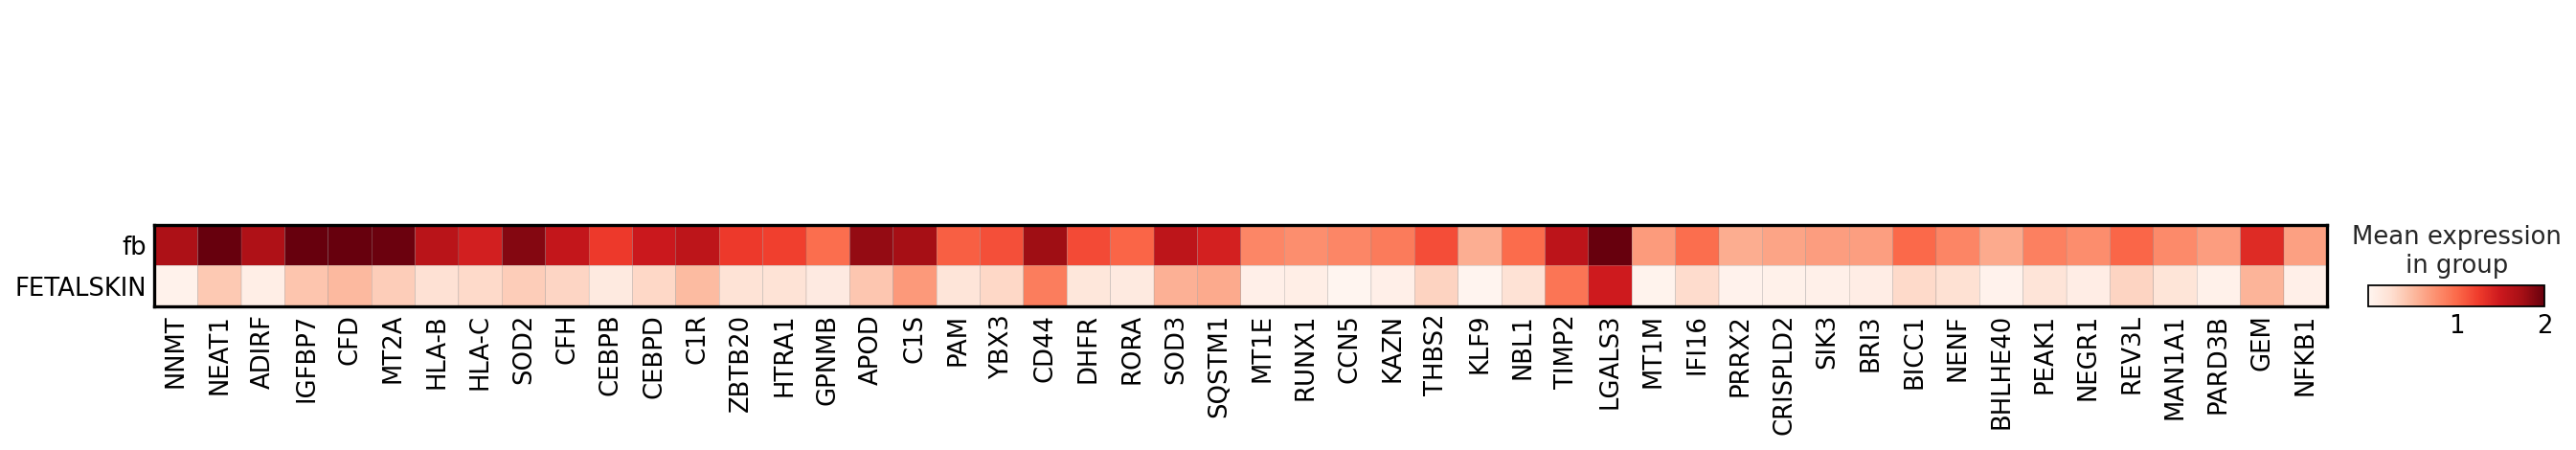

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


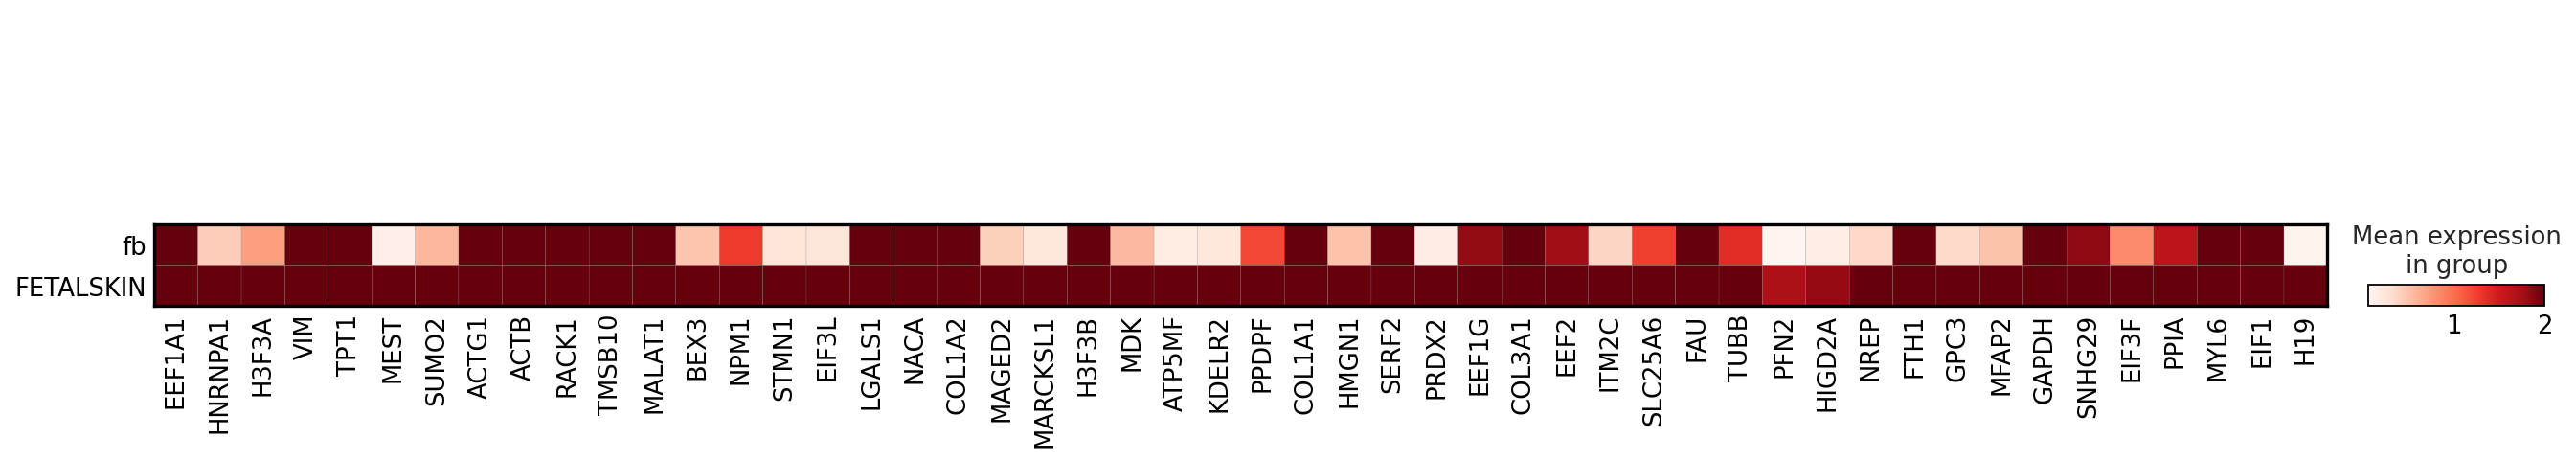

In [8]:
groupby = "Mapping_status2"
sc.pl.matrixplot(
    adata,
    GENES_DEGS["Adult"],
    groupby=groupby,
    #standard_scale="var",
    dendrogram=False,
    cmap="Reds", vmax=2,
    save="sfig10b_adult_degs.pdf"
)
sc.pl.matrixplot(
    adata,
     GENES_DEGS["Prenatal"],
    groupby=groupby,
    #standard_scale="var",
    dendrogram=False,
    cmap="Reds", vmax=2,
        save="sfig10b_prenatal_degs.pdf"

)



In [9]:
adata_f3only = adata[adata.obs["test13"].isin([ 'F3: FRC-like', 'CCL19+_skin' ])]
adata_f3only.obs["test13"].value_counts()

test13
F3: FRC-like    40842
CCL19+_skin         8
Name: count, dtype: int64

In [10]:
adata_f3only.X[:5,:5].A

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.60110346, 0.        , 0.60110346, 0.        , 0.        ],
       [0.        , 0.        , 1.61943235, 0.        , 0.        ]])

In [19]:
import gc
del(adata)
gc.collect()


# fetal only

In [21]:
# PATH = '/nfs/team298/ls34/new_disease_atlas/model_scanvi5_FETALSKIN_4494/adata_fetalonly.h5ad.countsonly'
# adata_fetal=sc.read_h5ad(PATH)
#PATH='/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas/adata_fetal_fbs.h5ad'
PATH =  '/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_prenatal_skin_fbonly.h5ad'
adata_fetal=sc.read_h5ad(PATH)
adata_fetal.X[:6,:6].A

array([[0., 0., 0., 0., 0., 0.],
       [1., 0., 2., 0., 0., 0.],
       [0., 0., 4., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [23]:
mapping_dict=adata_fetal.obs["test13"].to_dict()

with open("fetal_annotations.pkl", "wb") as f:
    pickle.dump(mapping_dict, f)

In [25]:
adata_fetal.X[:6,:6].A

array([[0., 0., 0., 0., 0., 0.],
       [1., 0., 2., 0., 0., 0.],
       [0., 0., 4., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [27]:
sc.pp.normalize_total(adata_fetal, target_sum=1e4)
sc.pp.log1p(adata_fetal)


In [28]:
pickle_file_path = '/nfs/team298/ls34/fb_dict.pkl'

with open(pickle_file_path, 'rb') as file:
    reynolds_short_final = pickle.load(file)
    
    pickle_file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'
with open(pickle_file_path, 'rb') as file:
    LESIONAL_GENES_VSHORT5 = pickle.load(file)
    
NEW_LIST = {"F2": reynolds_short_final["F2: Universal"] ,
            
         
            "Myofibroblast":     LESIONAL_GENES_VSHORT5["F6+F7"] +  LESIONAL_GENES_VSHORT5["F6-F8"]  
           }

In [29]:
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_fetal.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_fetal.var_names]
    return LIST



In [30]:

# Define file path
file_path = '/nfs/team298/ls34/fb_dict_lesional_FORWOUND_PLUSDP.pkl'

# Load the object
with open(file_path, 'rb') as file:
    ALL_GENES_NOF8_PLUSDP = pickle.load(file)

print("Loaded successfully!")

 

Loaded successfully!


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

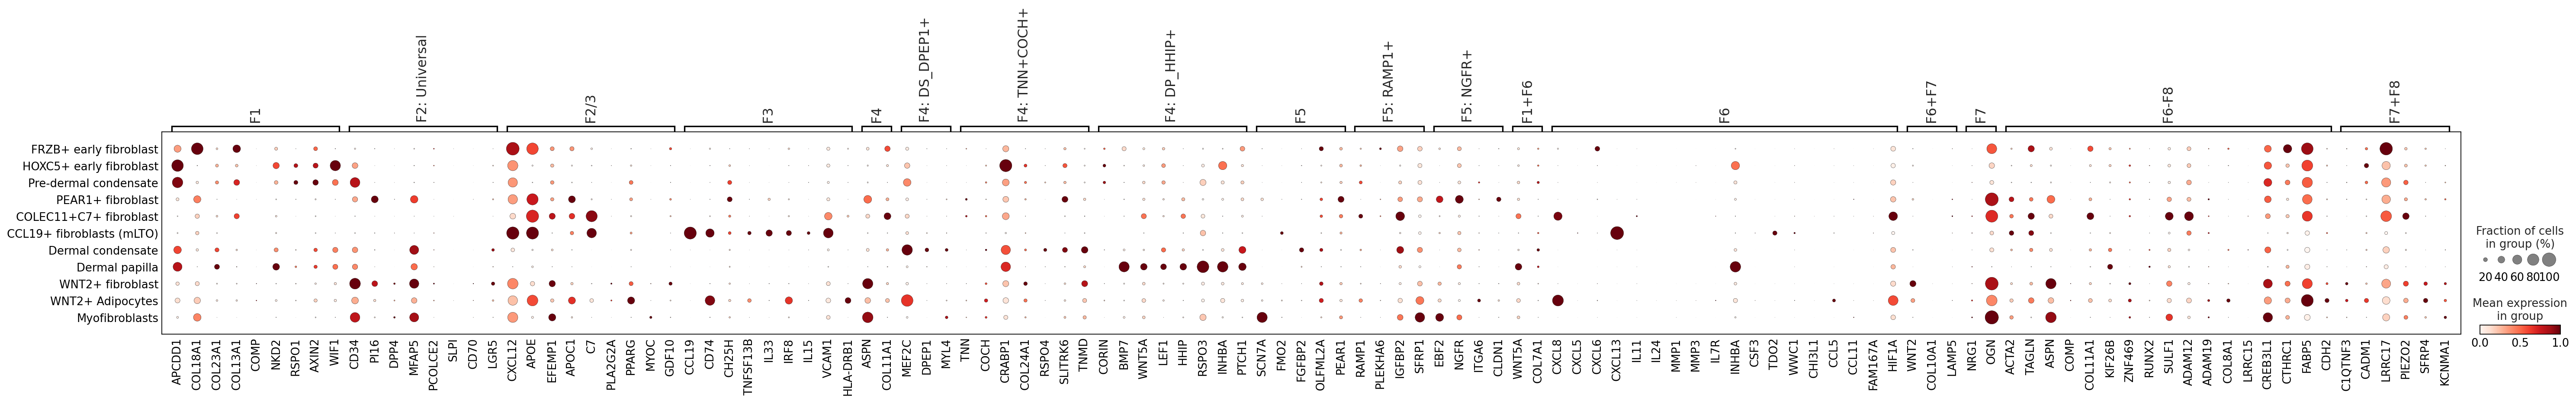

In [31]:
ORDER=[    'FRZB+ early fibroblast',
 'HOXC5+ early fibroblast',    'Pre-dermal condensate',  'PEAR1+ fibroblast',
       'COLEC11+C7+ fibroblast',
       # 'CCL19+_skin',
       'CCL19+ fibroblasts (mLTO)',
    
        'Dermal condensate', 'Dermal papilla',
        'WNT2+ fibroblast',  'WNT2+ Adipocytes',
      
 'Myofibroblasts']




sc.pl.dotplot(
        adata_fetal,
        remove_markers(ALL_GENES_NOF8_PLUSDP),
        groupby="test13",
        standard_scale="var",
        dendrogram=False,
            categories_order=ORDER,  
    save="10c_fetal_dotplot.pdf"

    ) 


In [32]:
# COLEC_GENES = ["COLEC11", "C7", "SULT1E1", "CFH", "CALCRL", "KLF9", "OMD", "CXCL8", "BMP5", "ANGPT1", "FOXC1","FOXC2", "AVPR1A", 
#  "ENPEP",  "CTSV", "COLEC10", "IL1R1", "ENG", "CLEC2B", "COL25A1", "KAZN", "FOXF2", "EYA1", "CEMIP", "CYP4X1", "KRT18"]

# sc.pl.dotplot(
#     adata_fetal,
#     COLEC_GENES,
#     groupby=groupby,
#    # standard_scale="var",
#     dendrogram=False,
# )

In [33]:
import gc
try:
    del adata
except: 
    1
gc.collect()


37363

# sfig 10d

In [34]:
df2=pd.read_csv("degs_fbs.csv")

In [35]:
RENAME = {"CCL19+ fibroblasts (mLTO)": "CCL19+_skin"}
adata_fetal.obs['test13']=adata_fetal.obs['test13'].map(RENAME).fillna(adata_fetal.obs['test13'])
adata_fetal.obs.test13.value_counts()

test13
WNT2+ fibroblast           74299
HOXC5+ early fibroblast    34303
Pre-dermal condensate      34181
Dermal condensate          23190
PEAR1+ fibroblast          18671
Myofibroblasts             15286
Dermal papilla             13240
FRZB+ early fibroblast     11041
WNT2+ Adipocytes            3156
COLEC11+C7+ fibroblast       510
CCL19+_skin                  109
Name: count, dtype: int64

In [49]:
fetal_fb_order=['Dermal papilla',
     'Dermal condensate',
 'Pre-dermal condensate',
     'HOXC5+ early fibroblast',
 'FRZB+ early fibroblast',
 'PEAR1+ fibroblast',
 'COLEC11+C7+ fibroblast', 'CCL19+_skin',



 'WNT2+ fibroblast',
 'WNT2+ Adipocytes',
'Myofibroblasts',]

In [52]:
def plot_matrix(cluster_scores, cmap="viridis", normalisation=None, colorbar_ticks= [0, 0.5, 1], dataset_name= "Prenatal Fibroblasts",
               reorder_dict=None, reorder_list = None, savepath="genemodule_no_n_specified.pdf"):
    max_score = cluster_scores.max().max()
    figsize = (8, 8)
    if reorder_list:
        cluster_scores = cluster_scores.loc[reorder_list]
    if reorder_dict:
        cluster_scores.rename(columns=reorder_dict, inplace=True)
    if not normalisation:
        cluster_scores_normalized = cluster_scores  #/ max_score
    else:
        if normalisation == "max":
            cluster_scores_normalized = cluster_scores / max_score
        elif normalisation == "minmax":
            cluster_scores_normalized = (cluster_scores - cluster_scores.min()) / (cluster_scores.max() - cluster_scores.min())
        elif normalisation == "row":
            cluster_scores_normalized = cluster_scores.div(cluster_scores.max(axis=0), axis=1)
        elif normalisation == "col":
            cluster_scores_normalized = cluster_scores.div(cluster_scores.max(axis=1), axis=0)
        else:
            print("Not valid normalisation method. ['max', 'minmax', 'row', 'col']")

    # Set the figure size before plotting
    plt.figure(figsize=figsize)  # Adjust as needed

    # Create the heatmap
    ax = sns.heatmap(
        cluster_scores_normalized.T,  # Transpose to get genes on y and clusters on x
        cmap=cmap,
        linewidths=0.0,
        linecolor=None,  # Add this
        square=True,  # Force square cells, sometimes fixes grid issues
        cbar_kws={"label": "Gene module score"},
        vmin=0  # Set the minimum value of the colorbar to 0
    )

    sns.despine()  # Removes spines, which may contribute to grid-like appearance
    cbar = ax.collections[0].colorbar
    #cbar.set_ticks(colorbar_ticks)
    #cbar.set_ticklabels(colorbar_ticks)

    # Add titles and labels as needed
    plt.title(normalisation)
    plt.xlabel(dataset_name)
    plt.ylabel('Adult Fibroblast Gene Modules')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.style.use("seaborn-white")  # Removes unnecessary background
    sns.set_style("white")
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'{savepath}', dpi=300, bbox_inches="tight", format="pdf")
    plt.show()


In [54]:
CONTROL_SIZE = 200 #default 50 (100 was good)
N_BINS=25 #default 25 (10 was good)
N = 1000

adata_fetal = sc.tl.score_genes(adata_fetal, df2["F1: Superficial"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F1")

In [55]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F2: Universal"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F2")
gc.collect()

790

In [56]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F2/3: Stroma_PPARG+"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F2/3")
gc.collect()

361

In [57]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F3: FRC-like"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F3")
gc.collect()

361

In [58]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F4: DS_DPEP1+"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F4: DS")
gc.collect()

363

In [59]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F4: TNN+COCH+"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F4: TNN+COCH+")
gc.collect()

365

In [60]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F4: DP_HHIP+"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F4: DP_HHIP+")
gc.collect()

367

In [61]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F5: RAMP1+"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F5: RAMP1+")
gc.collect()

369

In [62]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F5: NGFR+"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F5: NGFR+")
gc.collect()

371

In [63]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F6: Inflammatory myofibroblast"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F6")
gc.collect()

373

In [64]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F6: Myofibroblast"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F7")
gc.collect()

375

In [65]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F7: Fascia-like myofibroblast"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F8")
gc.collect()

377

In [66]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F_Fascia"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F_Fascia")

gc.collect()

381

/tmp/ipykernel_16750/3877336463.py:48: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")  # Removes unnecessary background


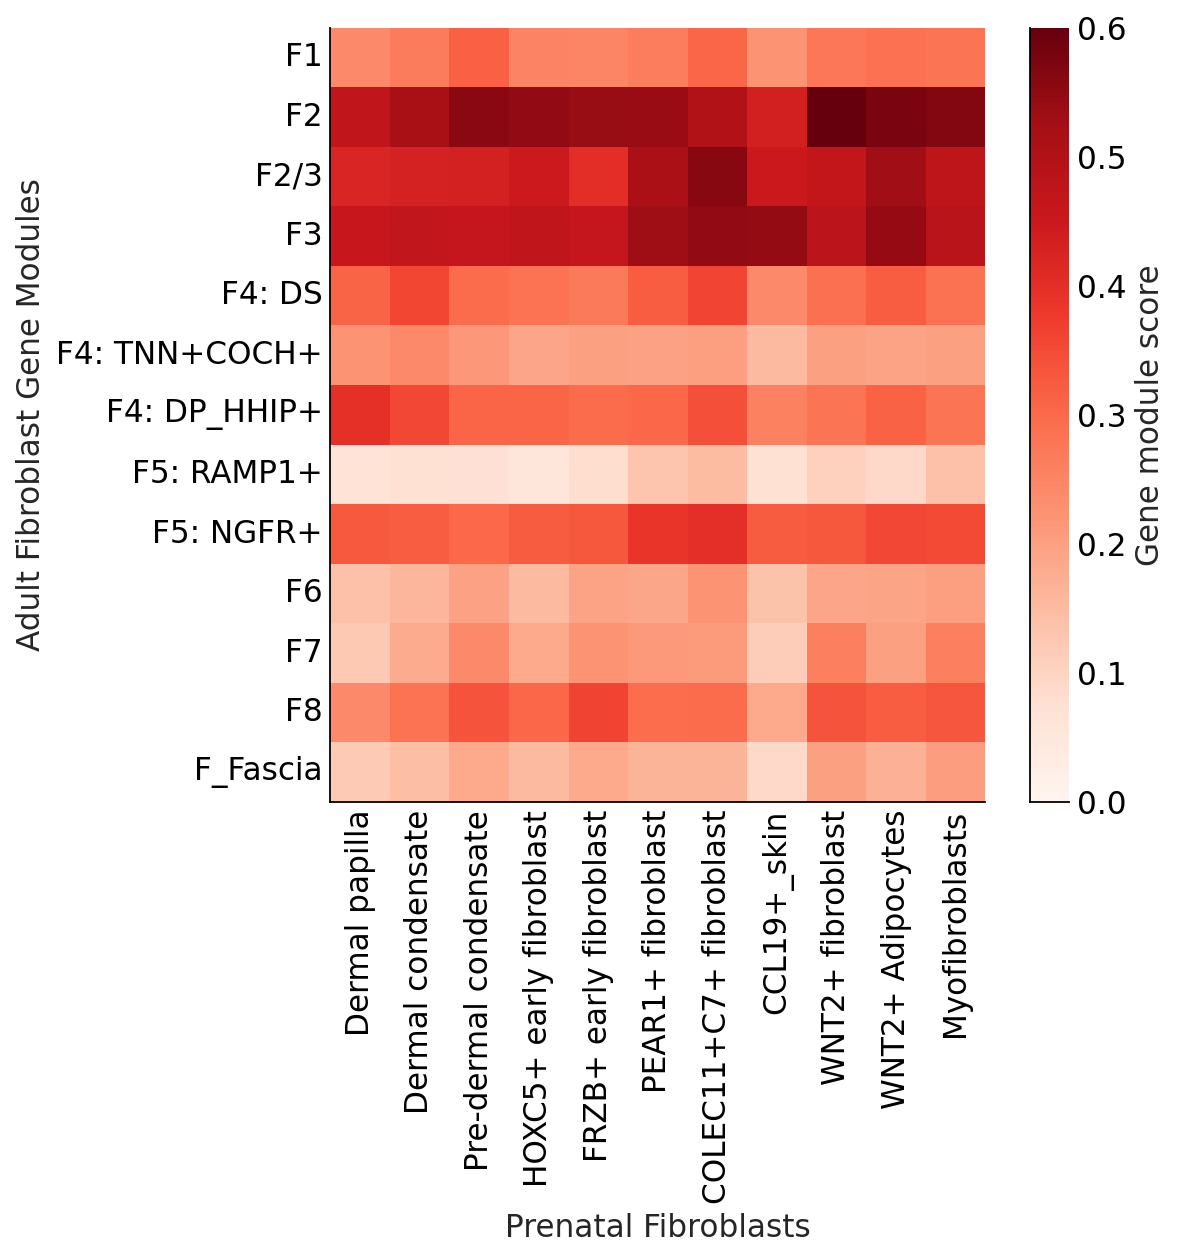

1000


In [67]:
cluster_scores = adata_fetal.obs.groupby('test13')[['F1', "F2", "F2/3", "F3", "F4: DS",
                                                 "F4: TNN+COCH+", "F4: DP_HHIP+", "F5: RAMP1+",
                                                 "F5: NGFR+", "F6", "F7", "F8", "F_Fascia"]].mean()
plot_matrix(cluster_scores, 
            cmap="Reds", 
            normalisation=None, 
            colorbar_ticks= [0, 0.5, 1], 
            dataset_name= "Prenatal Fibroblasts",
            reorder_dict=None, 
            reorder_list = fetal_fb_order,
            savepath=f"sfig10/sfig10d_genemodule_fetal_{N}.pdf"
           )
print(N)

In [68]:
# plot_matrix(cluster_scores, 
#             cmap="Reds", 
#             normalisation="minmax", 
#             colorbar_ticks= [0, 0.5, 1], 
#             dataset_name= "Prenatal Fibroblasts",
#             reorder_dict=None, 
#             reorder_list = fetal_fb_order
#            )

In [ ]:
sc.logging.print_versions()


